<a href="https://colab.research.google.com/github/zal-developer/Time_Series_Cores/blob/main/Project_3_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import glob
import pandas as pd
import holidays
import datetime as dt
from holidays import country_holidays

In [ ]:
!pip install zipfile
import zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [ ]:
#loading the data
fpath = '/content/drive/MyDrive/CodingDojo/04-DataViz/Week13/Data/Chicago_Crime_2001-2022.zip'

data_frames = []

with zipfile.ZipFile(fpath, 'r') as zip_ref:
    for filename in zip_ref.namelist():
        if filename.endswith('.csv'):
            df = pd.read_csv(zip_ref.open(filename))
            data_frames.append(df)

# Combine the DataFrames into a single DataFrame
df = pd.concat(data_frames)

# Print the DataFrame
print(df)

              ID                    Date        Primary Type  \
0        1326041  01/01/2001 01:00:00 AM             BATTERY   
1        1319931  01/01/2001 01:00:00 PM             BATTERY   
2        1324743  01/01/2001 01:00:00 PM            GAMBLING   
3        1310717  01/01/2001 01:00:00 AM     CRIMINAL DAMAGE   
4        1318099  01/01/2001 01:00:00 AM             BATTERY   
...          ...                     ...                 ...   
238853  12938029  12/31/2022 12:50:00 PM             ASSAULT   
238854  12937822  12/31/2022 12:50:00 PM             ASSAULT   
238855  12937583  12/31/2022 12:52:00 AM             BATTERY   
238856  12938420  12/31/2022 12:52:00 PM             ASSAULT   
238857  12939906  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                                    Description          Location Description  \
0                                        SIMPLE                     RESIDENCE   
1                                        SIMPLE                     R

In [ ]:
#showing last 5 rows
df.tail()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657
238857,12939906,12/31/2022 12:59:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,1511,15.0,29.0,NaN,NaN


In [ ]:
#showing summary info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [ ]:
#change date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,2001-01-01 13:00:00,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970


In [ ]:
#setting date as the index
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [ ]:
#resampling data to daily frequency
df_resampled = df.resample('D').size().rename('Crime Count')

In [ ]:
df_original = df.copy()
df_resampled = df_resampled.copy()

# Topic 1)

Comparing Police Districts

Which district had the most crimes in 2022?

Which had the least?


In [ ]:
#highest and lowest crimes districts
df_2022 = df.loc[df.index.year == 2022]
grouped_df = df_2022.groupby('District')
crime_counts = grouped_df.size()
most_crimes_district = crime_counts.sort_values(ascending=False).index[0]
least_crimes_district = crime_counts.sort_values().index[0]
print(f"District with the most crimes in 2022: {most_crimes_district}")
print(f"District with the least crimes in 2022: {least_crimes_district}")

District with the most crimes in 2022: 8.0
District with the least crimes in 2022: 31.0


Topic 2)

Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?


In [ ]:
import matplotlib.pyplot as plt

Percentage change in total crimes between 2001 and 2022: nan%


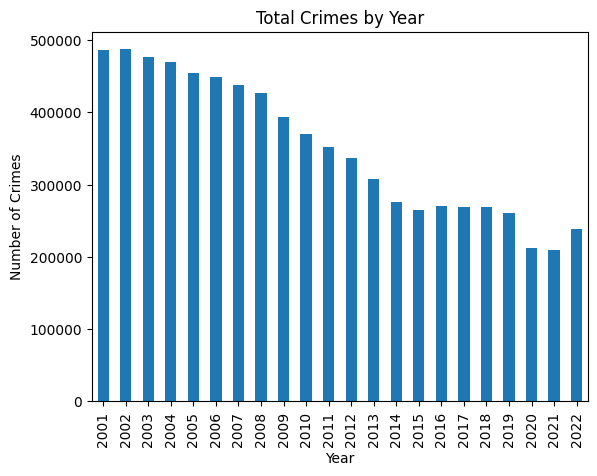

In [ ]:
#creating new year column
df['Year'] = df.index.year
grouped_by_year = df.groupby('Year').size()
# Group the DataFrame by year and count the number of crimes
grouped_by_year = df.groupby('Year').size()

# Calculate the percentage change in crime count between consecutive years
percentage_change = grouped_by_year.pct_change() * 100

# Print the first and last values of the percentage change series
print(f"Percentage change in total crimes between {grouped_by_year.index[0]} and {grouped_by_year.index[-1]}: {percentage_change.iloc[0]:.2f}%")

# Plot the total number of crimes by year
grouped_by_year.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Total Crimes by Year")
plt.show()

 -  The number of crimes is decreasing over the years.

-  

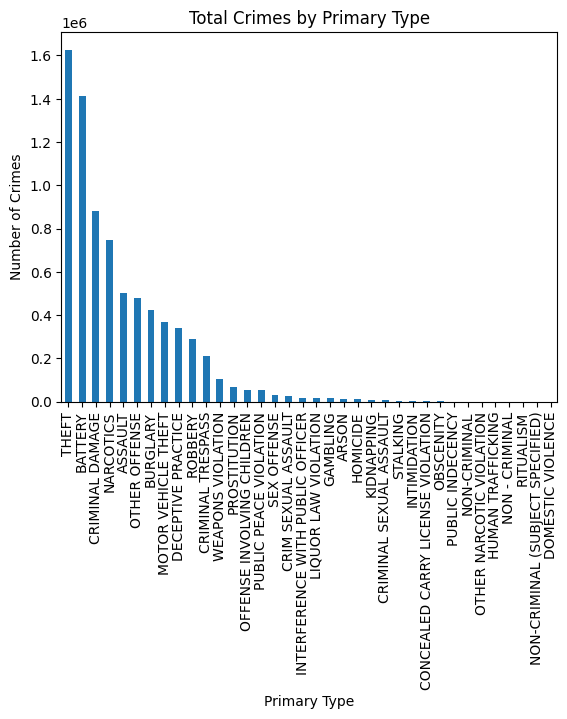

In [ ]:
# Group the DataFrame by primary type and count the number of crimes
grouped_by_primary_type = df.groupby('Primary Type').size()

# Sort the results in descending order
grouped_by_primary_type = grouped_by_primary_type.sort_values(ascending=False)

# Plot the bar chart
grouped_by_primary_type.plot(kind='bar')
plt.xlabel("Primary Type")
plt.ylabel("Number of Crimes")
plt.title("Total Crimes by Primary Type")
plt.show()

In [ ]:
# Group the DataFrame by year and crime type, and count the number of crimes
grouped_by_year_and_crime = df.groupby(['Year', 'Primary Type']).size().unstack()

# Calculate the percentage change in crime count between consecutive years for each crime type
percentage_change_by_crime = grouped_by_year_and_crime.pct_change() * 100

# Identify crime types with the greatest increase and decrease in the most recent year
latest_year = grouped_by_year_and_crime.index[-1]
most_increased_crime = percentage_change_by_crime.loc[latest_year].sort_values(ascending=False).index[0]
most_decreased_crime = percentage_change_by_crime.loc[latest_year].sort_values().index[0]

# Print the results
print(f"Crime type with the greatest increase in {latest_year}: {most_increased_crime}")
print(f"Crime type with the greatest decrease in {latest_year}: {most_decreased_crime}")

Crime type with the greatest increase in 2022: OTHER NARCOTIC VIOLATION
Crime type with the greatest decrease in 2022: GAMBLING


opic 3)

Comparing AM vs. PM Rush Hour:

Are crimes more common during AM rush hour or PM rush hour?

You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour

You can consider any crime that occurred between 4 - 7 PM as PM rush hour.

In [ ]:
def get_rush_hour_crimes(df):
  """
  This function filters the DataFrame based on the provided rush hour time ranges and returns the top 5 most common crimes during each rush hour.

  Args:
      df: The DataFrame containing crime data.

  Returns:
      A dictionary with two keys: "AM" and "PM", each containing a list of the top 5 most common crimes during the respective rush hour.
  """
  am_rush = df.loc[(df.index.hour >= 7) & (df.index.hour <= 10)]
  pm_rush = df.loc[(df.index.hour >= 16) & (df.index.hour <= 19)]

  am_top_5 = am_rush['Primary Type'].value_counts().head(5).index.to_list()
  pm_top_5 = pm_rush['Primary Type'].value_counts().head(5).index.to_list()

  return {"AM": am_top_5, "PM": pm_top_5}

rush_hour_crimes = get_rush_hour_crimes(df)

print(f"Top 5 crimes during AM rush hour: {rush_hour_crimes['AM']}")
print(f"Top 5 crimes during PM rush hour: {rush_hour_crimes['PM']}")

Top 5 crimes during AM rush hour: ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'BURGLARY', 'OTHER OFFENSE']
Top 5 crimes during PM rush hour: ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']


Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [ ]:
# Count the occurrences of "Motor Vehicle Theft" in AM and PM rush hours
am_rush = df.loc[(df.index.hour >= 7) & (df.index.hour <= 10)]
pm_rush = df.loc[(df.index.hour >= 16) & (df.index.hour <= 19)]
am_mvt_count = am_rush['Primary Type'].value_counts().get("Motor Vehicle Theft", 0)
pm_mvt_count = pm_rush['Primary Type'].value_counts().get("Motor Vehicle Theft", 0)

# Compare the counts
if am_mvt_count > pm_mvt_count:
    print("Motor Vehicle Theft is more common during AM rush hour.")
elif pm_mvt_count > am_mvt_count:
    print("Motor Vehicle Theft is more common during PM rush hour.")
else:
    print("Motor Vehicle Theft occurs equally during AM and PM rush hours.")

Motor Vehicle Theft occurs equally during AM and PM rush hours.


Topic 4)

Comparing Months:

Answer the question: ​What months have the most crime? What months have the least?

Answer the question: Are there any individual crimes that do not follow this pattern?
If so, which crimes?

In [ ]:
#extracting month from the date column
df['Month'] = df.index.month
monthly_crime_counts = df.groupby('Month')['Primary Type'].count().sort_values(ascending=False)

In [ ]:
#identify most and least crimes
most_crime_months = monthly_crime_counts.index[:3].tolist()
least_crime_months = monthly_crime_counts.index[-3:].tolist()
#print results
print(f"Months with the most crime: {most_crime_months}")
print(f"Months with the least crime: {least_crime_months}")

Months with the most crime: [7, 8, 5]
Months with the least crime: [1, 12, 2]


In [ ]:
# Calculate the difference in crime counts between consecutive months
crime_diff = monthly_crime_counts.diff()

# Identify crimes with positive difference in specific months
non_conforming_crimes = {}
for month, diff in crime_diff.items():
    for crime, count in df[df['Month'] == month].groupby('Primary Type')['Primary Type'].count().items():
        if diff > 0 and crime not in non_conforming_crimes:
            non_conforming_crimes[crime] = []
        if diff > 0 and month not in non_conforming_crimes[crime]:
            non_conforming_crimes[crime].append(month)

# Print the non-conforming crimes
if non_conforming_crimes:
    print("\nCrimes that do not follow the pattern:")
    for crime, months in non_conforming_crimes.items():
        print(f"- {crime}: {months}")
else:
    print("\nThere are no crimes that do not follow the pattern.")


There are no crimes that do not follow the pattern.


Topic 5)

 Comparing Holidays:

Answer the question: ​What are the top 3 holidays with the largest number of crimes?

Answer the question:  For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [ ]:
## making a date range that covers full dataset
all_days = pd.date_range(start=df.index.min(), end=df.index.max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [ ]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [ ]:
## Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 00:00:00


"New Year's Day"

In [ ]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:3]

["New Year's Day", None, None]

In [ ]:
## Saving  holiday types as column
df["US Holiday"] = [us_holidays.get(day) for day in df.index]

<ipython-input-100-6e53ef1d7758>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["US Holiday"] = [us_holidays.get(day) for day in df.index]


In [ ]:
## US Holidays
df['US Holiday'].value_counts()

US Holiday
New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (observed)                         5884
Veterans Day (observed)                             5842
Christmas Day (observed)                            4929
New Year's Day (observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (observed)     1403
Name: count, dtype: int64

<ipython-input-104-446873c02412>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='center');


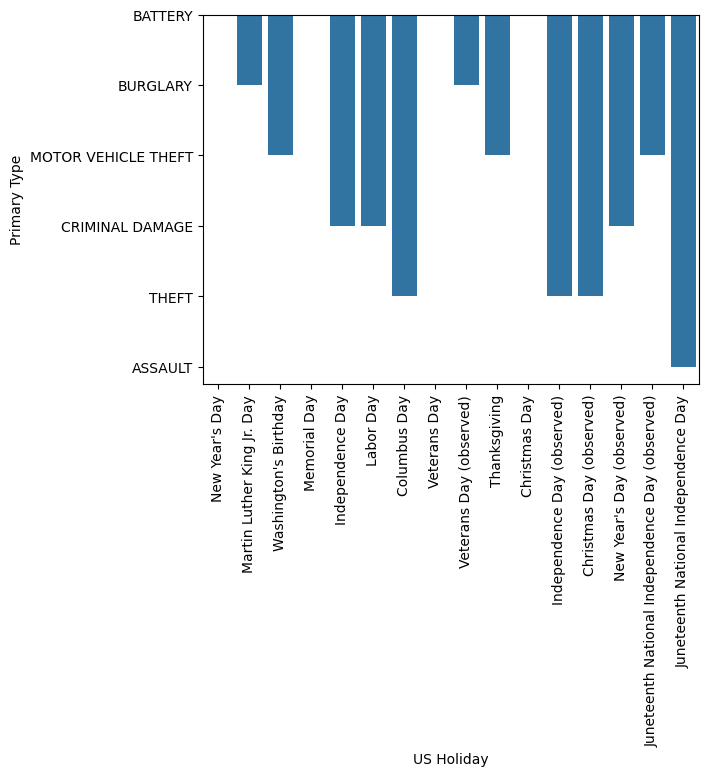

In [ ]:
import seaborn as sns
import numpy as np
ax = sns.barplot(data=df, x='US Holiday',y='Primary Type',estimator=np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='center');

- Top 3 holidays are Juneteenth National Independence day,Columbus day,Christmas day.